# Proyecto Final

## Grabador de Audio .WAP

In [1]:
import pyaudio
import wave

# Parametros
FORMAT=pyaudio.paInt16
CHANNELS=1
RATE=44100
CHUNK=1024
duracion=10
archivo="Audio.wav"

# pyaudio
audio=pyaudio.PyAudio()

# inicio gravacion
stream=audio.open(format=FORMAT,channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)

print("grabando...")
frames=[]

for i in range(0, int(RATE/CHUNK*duracion)):
    data=stream.read(CHUNK)
    frames.append(data)
print("grabación terminada")

# Fin gravacion
stream.stop_stream()
stream.close()
audio.terminate()

# Crea o reemplaza el archivo de audio
waveFile = wave.open(archivo, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

grabando...
grabación terminada


## Graficador

D:\ProgramasU\ProgramasU\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
D:\ProgramasU\ProgramasU\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


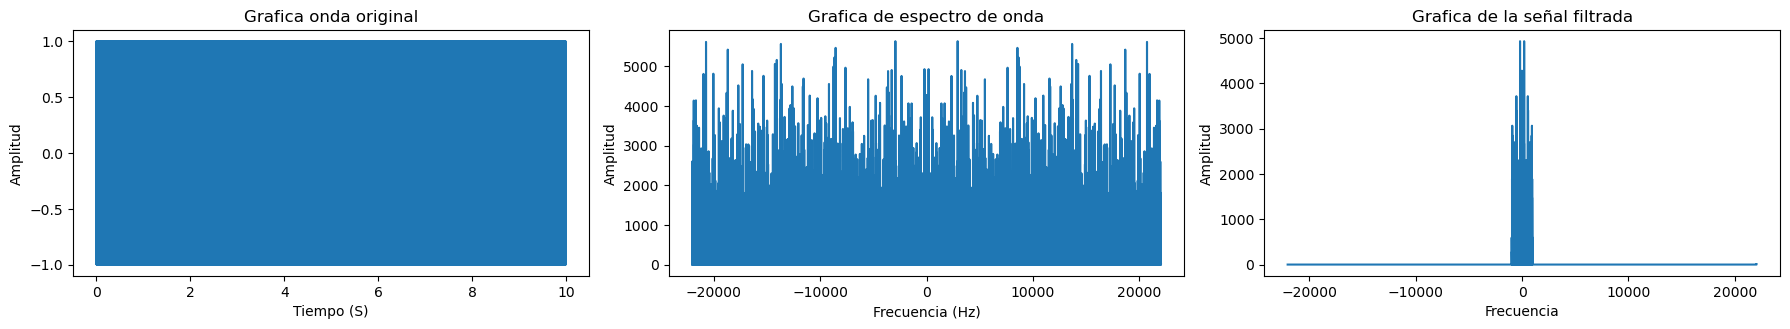

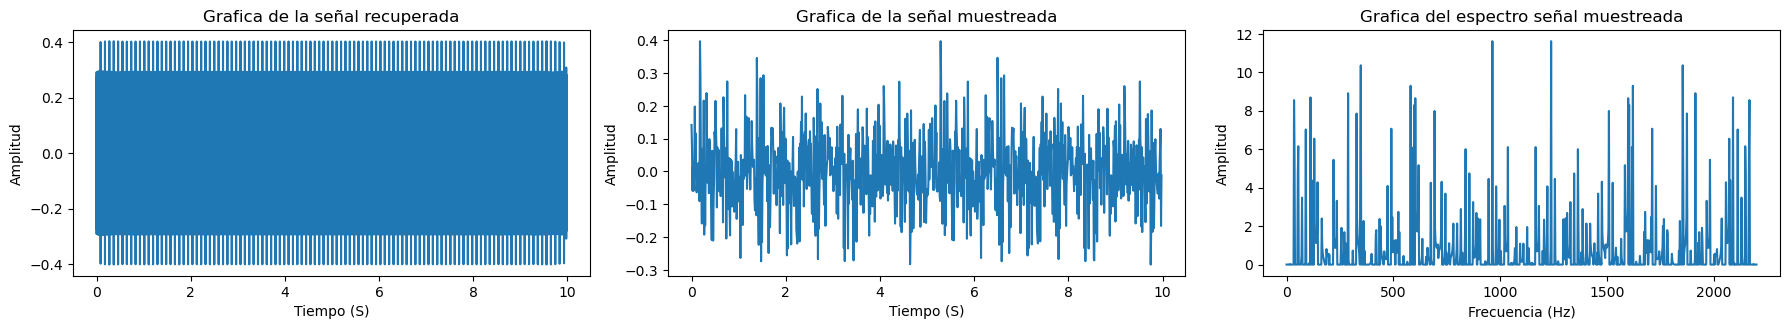

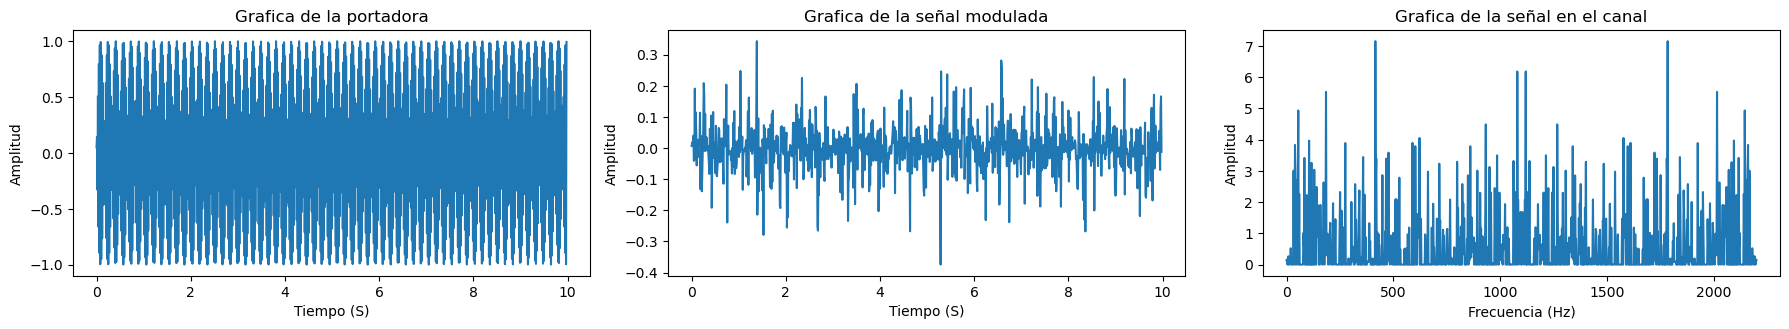

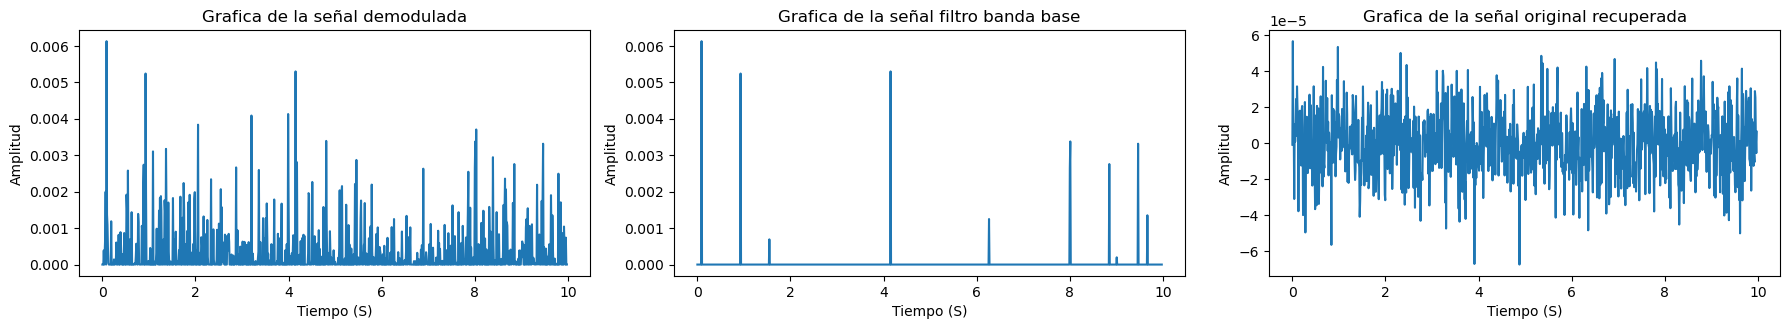

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as waves
from scipy.fft import fft, fftfreq, ifft, fftshift

# Selecciona archivo de audio
archivo = 'Audio.wav'
muestreo, sonido = waves.read(archivo)

# Dominio de la frecuencia
tamano=np.shape(sonido)
duracion = len(sonido) /muestreo

L = len(sonido)

l = sonido.shape[0]/muestreo
t = np.linspace(0., l, sonido.shape[0])

# Transformada del Audio
yff = fftshift(fft(sonido))

# Frecuencia
sonidof = fftshift(fftfreq(yff.size, 1/muestreo))

# Filtro Ideal 
filtro = np.copy(yff)
Fil = np.where((sonidof <= 1000) & (sonidof >= -1000))
filtro[0:Fil[0][0]] = 0
filtro[Fil[0][-1]:-1]= 0

# Recuperar señales 
SeñalRe = ifft(filtro)

# Muestreo
n = 1000
mst =t[1::int(t.size/n)]
SeñalM = SeñalRe[1::int(SeñalRe.size/n)] 
SeñalFre = fftshift(fftfreq(mst.size, 1/2200))
SeñalFre = SeñalFre + abs(max(SeñalFre))

# Transformada de la señal muestreada
yff2 = fft(SeñalM)

# Modulacion de la señal muestreada
w = 10000000
SeñalP = np.cos(2*np.pi*w*mst)
SeñalMOD = SeñalP*SeñalM

# Pasa Por Canal ideal
SeñalMODC = fftshift(fft(SeñalMOD))

# Se Realiza La Demodulación 
SeñalDemo = ifft(SeñalMOD)
SeñalDemoLa = SeñalDemo*SeñalP

# Se  Aplica El Filtro banda base
FMAX = 8000
FMUES = 2*FMAX
FCORTE = 5000
WB2 = 2*(FCORTE/FMUES)
filtro2 = np.amax(SeñalDemoLa)*WB2
filtro2 = np.copy(SeñalDemoLa)
filtro2[abs(SeñalDemoLa) < WB2 * max(abs(SeñalDemoLa))] = 0

# Señal Recuperada Final
SeñalRe2 = ifft(filtro2)

plt.close("all")

# Grafica de la onda original
plt.figure(figsize=(18, 6))
plt.subplot(2,3,1) 
plt.plot(t, sonido)
plt.title("Grafica onda original")
plt.xlabel("Tiempo (S)")
plt.ylabel("Amplitud")

# Grafica del espectro de onda
plt.subplot(2,3,2) 
plt.plot(sonidof, np.where(yff < 0, 0, yff))
# plt.xlim(0, 2000)
plt.title("Grafica de espectro de onda") 
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")

# Grafica de la onda con filtro ideal paso bajo
plt.subplot(2,3,3)
plt.plot(sonidof, np.where(filtro < 0, 0, filtro))
# plt.xlim(0, 2000)
plt.title("Grafica de la señal filtrada") 
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")

plt.tight_layout() 
plt.show()

# Grafica de la señal recuperada
plt.figure(figsize=(18, 6))
plt.subplot(2,3,1)
plt.plot(t, SeñalRe)
plt.title("Grafica de la señal recuperada") 
plt.xlabel("Tiempo (S)")
plt.ylabel("Amplitud")

# Grafica de la señal de muestra
plt.subplot(2,3,2)
plt.plot(mst, SeñalM)
plt.title("Grafica de la señal muestreada") 
plt.xlabel("Tiempo (S)")
plt.ylabel('Amplitud')

# Grafica del espetctro señal muestra
plt.subplot(2,3,3)
plt.plot(SeñalFre, np.where(yff2 < 0, 0, yff2))
plt.title("Grafica del espectro señal muestreada") 
plt.xlabel("Frecuencia (Hz)")
plt.ylabel('Amplitud')

plt.tight_layout() 
plt.show()

# Grafica de la portadora
plt.figure(figsize=(18, 6))
plt.subplot(2,3,1)
plt.plot(mst, SeñalP)
plt.title("Grafica de la portadora") 
plt.xlabel("Tiempo (S)")
plt.ylabel('Amplitud')

# Grafica de la señal modulada
plt.subplot(2,3,2)
plt.plot(mst, SeñalMOD)
plt.title("Grafica de la señal modulada") 
plt.xlabel("Tiempo (S)")
plt.ylabel('Amplitud')

# Grafica de la señal en el canal
plt.subplot(2,3,3)
plt.plot(SeñalFre, np.where(SeñalMODC < 0, 0, SeñalMODC))
plt.title("Grafica de la señal en el canal") 
plt.xlabel("Frecuencia (Hz)")
plt.ylabel('Amplitud')

plt.tight_layout() 
plt.show()

# Grafica de la señal demodulada
plt.figure(figsize=(18, 6))
plt.subplot(2,3,1)
plt.plot(mst, np.where(SeñalDemoLa < 0, 0, SeñalDemoLa))
plt.title("Grafica de la señal demodulada") 
plt.xlabel("Tiempo (S)")
plt.ylabel('Amplitud')

# Grafida de la señal filtro banda base
plt.subplot(2,3,2)
plt.plot(mst, np.where(filtro2 < 0, 0, filtro2))
plt.title("Grafica de la señal filtro banda base") 
plt.xlabel("Tiempo (S)")
plt.ylabel('Amplitud')

# Grafica de la señal original recuperada
plt.subplot(2,3,3)
plt.plot(mst, SeñalRe2)
plt.title("Grafica de la señal original recuperada") 
plt.xlabel("Tiempo (S)")
plt.ylabel('Amplitud')

plt.tight_layout() 
plt.show()


## Convertidor final

In [32]:
import librosa
import soundfile as sf
import numpy as np

# Rango de frecuencia (Hz)
frecuencia_corte_bajo = 1000
#frecuencia_corte_bajo = 2000 
#frecuencia_corte_alto = 3000  

# seleccion archivo de Audio
archivo = 'Audio.wav'
sonido, muestreo = librosa.load(archivo, sr=None)

# Elimina ruidos de alta frecuencia 
sonido_filtrado = librosa.effects.preemphasis(sonido, coef=0.95)

# Guarda Archivo de Audio limpio
output_filename = "Audio_Final.wav"
sf.write(output_filename, sonido_filtrado, muestreo)
